In [183]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats import weightstats
import itertools
from scipy.stats import ttest_ind

In [184]:
students = pd.read_csv('stud_math.csv')

In [185]:
with pd.option_context('display.max_columns', None, 'display.max_rows', None):
    display(students)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [186]:
numerical_columns = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime',
                     'failures', "studytime, granular", 'famrel',
                     'freetime', 'goout', 'health', 'absences', 'score']  # список из колонок, содержащих числа

non_numerical_columns = ['school', 'sex', 'address', 'famsize', 'Pstatus',
                         'Mjob', 'Fjob', 'reason', 'guardian',
                         'schoolsup', 'famsup', 'paid',
                         'activities', 'nursery', 'higher',
                         'internet', 'romantic']  # список из колонок, содержащих строки

In [187]:
"""выбросы численных переменных"""


def extra_numerical(column):
    perc25 = students.loc[:, column].quantile(0.25)
    perc75 = students.loc[:, column].quantile(0.75)
    IQR = perc75 - perc25
    print('25%: {},'. format(perc25), '75% : {},'. format(perc75), 'IQR : {},'. format(IQR),
          "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR), 'для ', column)
    #temp_col = students.loc[:, column].reset_index()
    #temp_col = temp_col > perc75
    # display(temp_col)
    '''temp_col.describe()'''

In [188]:
for col in numerical_columns:
    extra_numerical(col)

25%: 16.0, 75% : 18.0, IQR : 2.0, Границы выбросов: [13.0, 21.0]. для  age
25%: 2.0, 75% : 4.0, IQR : 2.0, Границы выбросов: [-1.0, 7.0]. для  Medu
25%: 2.0, 75% : 3.0, IQR : 1.0, Границы выбросов: [0.5, 4.5]. для  Fedu
25%: 1.0, 75% : 2.0, IQR : 1.0, Границы выбросов: [-0.5, 3.5]. для  traveltime
25%: 1.0, 75% : 2.0, IQR : 1.0, Границы выбросов: [-0.5, 3.5]. для  studytime
25%: 0.0, 75% : 0.0, IQR : 0.0, Границы выбросов: [0.0, 0.0]. для  failures
25%: -6.0, 75% : -3.0, IQR : 3.0, Границы выбросов: [-10.5, 1.5]. для  studytime, granular
25%: 4.0, 75% : 5.0, IQR : 1.0, Границы выбросов: [2.5, 6.5]. для  famrel
25%: 3.0, 75% : 4.0, IQR : 1.0, Границы выбросов: [1.5, 5.5]. для  freetime
25%: 2.0, 75% : 4.0, IQR : 2.0, Границы выбросов: [-1.0, 7.0]. для  goout
25%: 3.0, 75% : 5.0, IQR : 2.0, Границы выбросов: [0.0, 8.0]. для  health
25%: 0.0, 75% : 8.0, IQR : 8.0, Границы выбросов: [-12.0, 20.0]. для  absences
25%: 40.0, 75% : 70.0, IQR : 30.0, Границы выбросов: [-5.0, 115.0]. для  score


##### по этим данным сложно что-то сказать, поэтому отберем данные вручную

In [189]:
studenst = students[(students.age > 14) & (students.age < 23)]
students = students[(students.Medu >= 0) & (students.Medu < 5)]
students = students[(students.Fedu >= 0) & (students.Fedu < 5)]
students = students[(students.traveltime >= 0) & (students.traveltime < 5)]
students = students[(students.studytime >= 0) & (students.studytime < 5)]
students = students[(students.failures >= 0) & (students.failures < 4)]
students = students[(students.famrel > 0) & (students.famrel < 6)]
students = students[(students.freetime > 0) & (students.freetime < 6)]
students = students[(students.goout > 0) & (students.goout < 6)]
students = students[(students.health > 0) & (students.health < 6)]
students = students[(students.score >= 0) & (students.score <= 100)]

In [190]:
students["studytime, granular"].describe()

count    270.000000
mean      -6.033333
std        2.540892
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: studytime, granular, dtype: float64

<AxesSubplot:xlabel='studytime, granular', ylabel='score'>

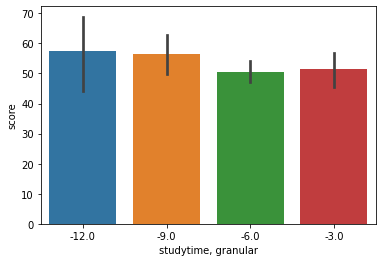

In [191]:
sns.barplot(x = "studytime, granular", y = 'score', data = students)


<AxesSubplot:ylabel='Frequency'>

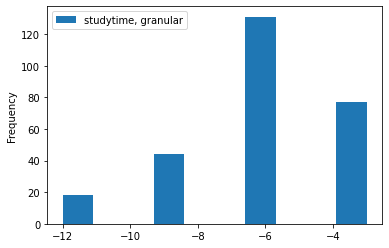

In [192]:
students.plot(x = 'score', y = "studytime, granular", kind = 'hist')

In [193]:
'''заменяем все пропуски и nan на None'''


def clear_non_numerical(column):
    students.loc[:, column] = students.loc[:, column].apply(lambda x: None if str(x).strip() == ''
                                                            else None if str(x) == 'nan' else x)
    display(pd.DataFrame(students.loc[:, column].value_counts()))

In [194]:
for col in non_numerical_columns:
    clear_non_numerical(col)

,school
GP,234
MS,36


,sex
F,144
M,126


,address
U,206
R,55


,famsize
GT3,175
LE3,79


,Pstatus
T,222
A,22


,Mjob
other,91
services,67
at_home,39
teacher,37
health,25


,Fjob
other,138
services,69
teacher,22
at_home,11
health,9


,reason
course,91
reputation,72
home,69
other,25


,guardian
mother,171
father,56
other,18


,schoolsup
no,226
yes,36


,famsup
yes,140
no,102


,paid
no,137
yes,108


,activities
yes,131
no,128


,nursery
yes,203
no,54


,higher
yes,246
no,13


,internet
yes,213
no,33


,romantic
no,167
yes,88


In [195]:
with pd.option_context('display.max_columns', None, 'display.max_rows', None):
    display(students)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,None,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,None,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,None,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,None,no,yes,-6.0,yes,yes,None,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,None,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,None,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
9,GP,M,15,U,None,None,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0
10,GP,F,15,U,GT3,T,4.0,4.0,teacher,health,reputation,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,3.0,3.0,3.0,2.0,0.0,45.0


In [196]:
students.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               270 non-null    object 
 1   sex                  270 non-null    object 
 2   age                  270 non-null    int64  
 3   address              261 non-null    object 
 4   famsize              254 non-null    object 
 5   Pstatus              244 non-null    object 
 6   Medu                 270 non-null    float64
 7   Fedu                 270 non-null    float64
 8   Mjob                 259 non-null    object 
 9   Fjob                 249 non-null    object 
 10  reason               257 non-null    object 
 11  guardian             245 non-null    object 
 12  traveltime           270 non-null    float64
 13  studytime            270 non-null    float64
 14  failures             270 non-null    float64
 15  schoolsup            262 non-null    obj

In [197]:
"""строим боксплоты номинативных переменных"""


def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(8, 4))
    sns.boxplot(x=column, y='score',
                data=students.loc[students.loc[:, column].isin(students.loc[:, column].value_counts()).index[:]], ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

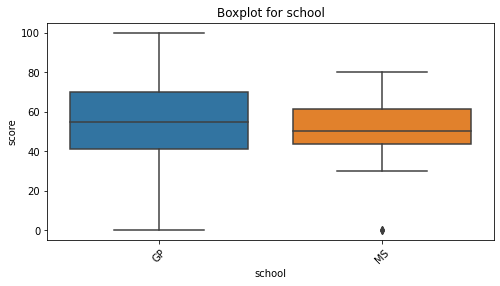

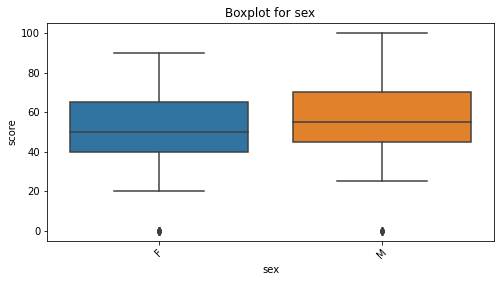

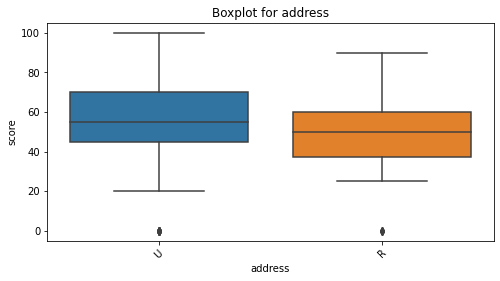

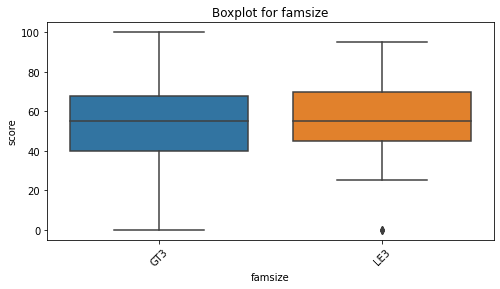

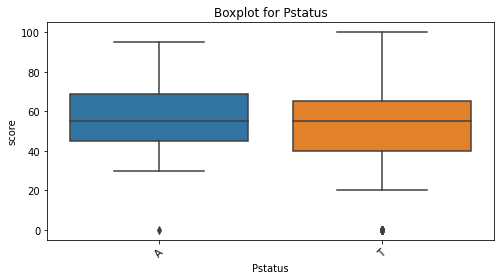

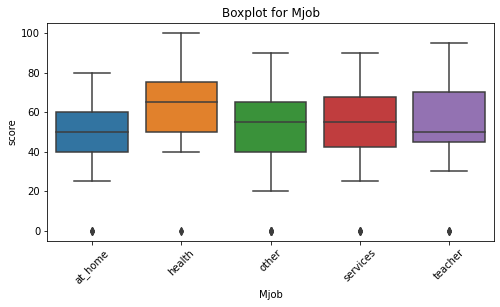

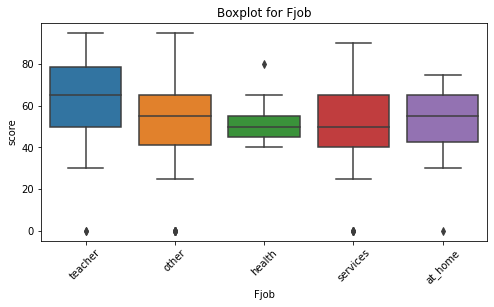

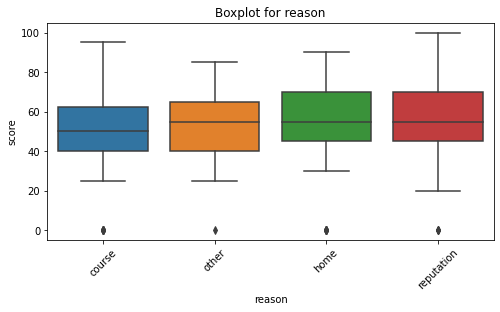

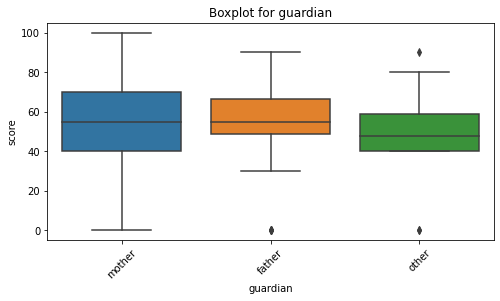

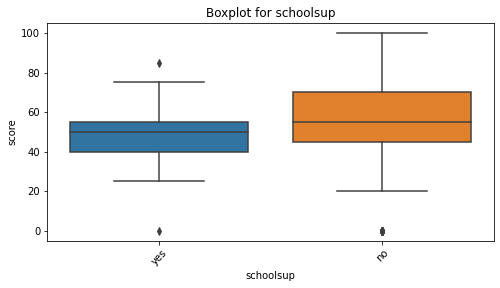

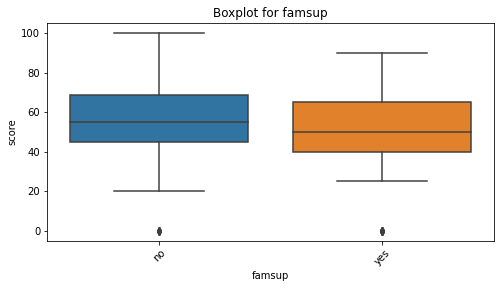

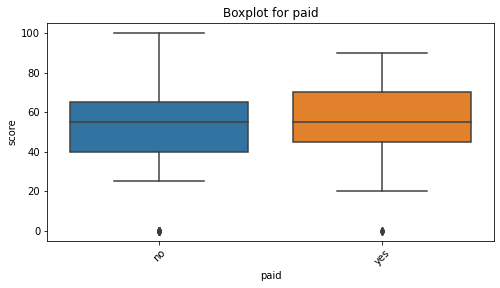

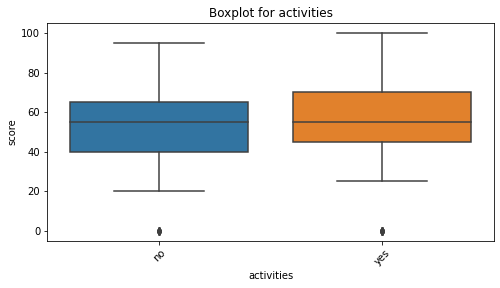

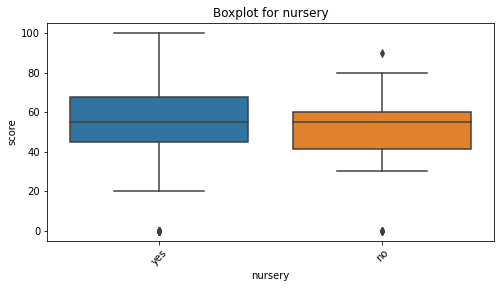

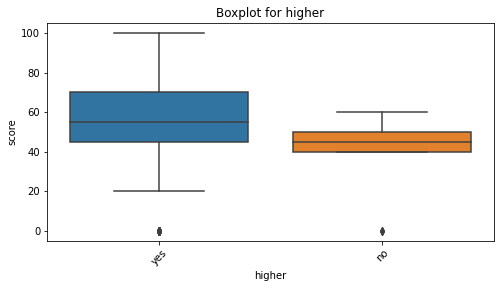

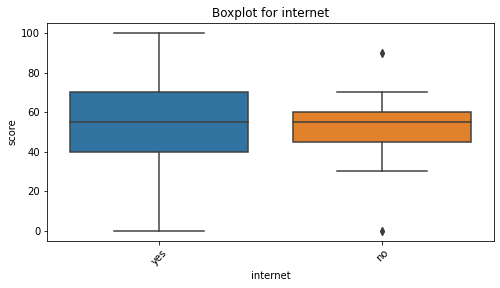

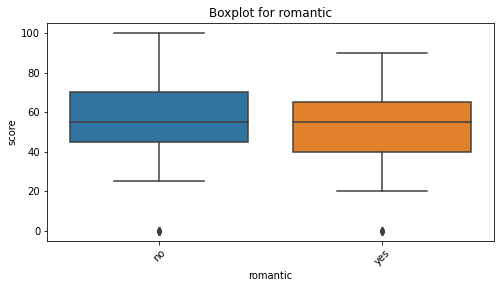

In [198]:
for col in non_numerical_columns:
    get_boxplot(col)

## по графикам видно, что в среднем баллы не зависят 1) от пола ученика; 2) причины выбора школы; 3) семейной образовательной поддержки; 4) дополнительных платных занятий; 5) внеучебной активности; 6) отношений

### однако стоит проверить, есть ли статистическая разница в распределении оценок по номинативным признакам

In [199]:
def get_stat_dif(column):
    deviation = False  # есть ли отклонения
    cols = students.loc[:, column].value_counts()
    combs = list(itertools.combinations(cols, 2))
    for comb in combs:
        if ttest_ind(students.loc[students.loc[:, column] == comb[0], 'score'],
                     students.loc[students.loc[:, column] == comb[1], 'score']).pvalue <= 0.05/len(combs):
            print('Найдены статистические различия для ', column)
            deviation = True
            break
    if deviation == False:
        print('Статистических отклонений в {} не найдено'.format(column))

In [200]:
for col in non_numerical_columns:
    get_stat_dif(col)

Статистических отклонений в school не найдено
Статистических отклонений в sex не найдено
Статистических отклонений в address не найдено
Статистических отклонений в famsize не найдено
Статистических отклонений в Pstatus не найдено
Статистических отклонений в Mjob не найдено
Статистических отклонений в Fjob не найдено
Статистических отклонений в reason не найдено
Статистических отклонений в guardian не найдено
Статистических отклонений в schoolsup не найдено
Статистических отклонений в famsup не найдено
Статистических отклонений в paid не найдено
Статистических отклонений в activities не найдено
Статистических отклонений в nursery не найдено
Статистических отклонений в higher не найдено
Статистических отклонений в internet не найдено
Статистических отклонений в romantic не найдено


##### исходя из этого мы можем выкинуть только предложенные выше колонки

#  

#### посмотрим на корреляцию численных признаков

In [201]:
students.corr()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.156098,-0.152376,0.087588,-0.072191,0.212727,0.072191,0.070360,0.017740,0.110736,-0.023856,0.079032,-0.144235
Medu,-0.156098,1.000000,0.627418,-0.143815,0.094751,-0.213575,-0.094751,-0.036480,-0.004722,0.059492,-0.073228,-0.026746,0.171646
Fedu,-0.152376,0.627418,1.000000,-0.186203,0.025344,-0.256484,-0.025344,-0.036605,-0.066274,0.006789,0.014179,0.027926,0.095503
traveltime,0.087588,-0.143815,-0.186203,1.000000,-0.133266,0.000854,0.133266,-0.010406,0.023705,-0.010253,0.015700,-0.067757,-0.032666
studytime,-0.072191,0.094751,0.025344,-0.133266,1.000000,-0.147044,-1.000000,0.064475,-0.149896,-0.115080,-0.089765,-0.015536,0.084717
failures,0.212727,-0.213575,-0.256484,0.000854,-0.147044,1.000000,0.147044,-0.024404,0.149361,0.089695,0.088065,0.067151,-0.347724
"studytime, granular",0.072191,-0.094751,-0.025344,0.133266,-1.000000,0.147044,1.000000,-0.064475,0.149896,0.115080,0.089765,0.015536,-0.084717
famrel,0.070360,-0.036480,-0.036605,-0.010406,0.064475,-0.024404,-0.064475,1.000000,0.176577,0.051373,0.118365,-0.088148,0.017158
freetime,0.017740,-0.004722,-0.066274,0.023705,-0.149896,0.149361,0.149896,0.176577,1.000000,0.269817,0.163111,0.042485,0.027823
goout,0.110736,0.059492,0.006789,-0.010253,-0.115080,0.089695,0.115080,0.051373,0.269817,1.000000,0.016821,-0.049952,-0.165384


# как мы видим, явной линейной зависимости оценок от других параметров нет, поэтому удалить какой-либо признак мы не можем


# удалям номинативные параметры, которые выбрали выше

In [202]:
for col in ['sex', 'reason', 'famsup', 'paid', 'activities', 'romantic']:
    students.drop([col], inplace = True, axis = 1)

In [203]:
students

,school,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,guardian,...,nursery,"studytime, granular",higher,internet,famrel,freetime,goout,health,absences,score
0,GP,18,U,None,A,4.0,4.0,at_home,teacher,mother,...,yes,-6.0,yes,None,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,17,U,GT3,None,1.0,1.0,at_home,other,father,...,no,-6.0,yes,yes,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,15,U,LE3,T,1.0,1.0,at_home,other,mother,...,yes,-6.0,yes,yes,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,15,U,GT3,T,4.0,2.0,health,None,mother,...,yes,-9.0,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,16,U,GT3,T,3.0,3.0,other,other,father,...,yes,-6.0,yes,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,20,U,LE3,A,2.0,2.0,services,services,None,...,yes,-6.0,yes,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,17,U,LE3,T,3.0,1.0,services,services,mother,...,no,-3.0,yes,yes,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,21,R,GT3,T,1.0,1.0,other,other,None,...,no,-3.0,None,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,18,R,LE3,T,3.0,2.0,services,other,mother,...,no,-3.0,yes,yes,4.0,4.0,1.0,5.0,0.0,50.0
